# install tweepy

In [175]:
!pip install tweepy

# import libraries python

* used NLP and NLTK with wordnet et stopwords

In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import tweepy
import csv
import os
import pandas as pd

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from sklearn.model_selection import train_test_split
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import RegexpTokenizer, WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
from string import punctuation
import collections
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import en_core_web_sm

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Read our dasasets**

In [177]:
datasets = pd.read_csv('../input/tweetsdatasets/data.csv' )

In [178]:
datasets.head()


,user,Text
0,Education1939,This past week The Staff Recognition Committee...
1,alexanderrusso,"RT @UNICEFmedia: ""Evidence shows that schools ..."
2,TaleamSystems,Taleam Systems' CEO implemented the Student e-...
3,javrsda,Ya quiero que salga la nueva temporada de Sex ...
4,Calpe19,RT @LizzyJPrice: @JonnyGeller A great loss. Wh...


In [179]:
datasets.shape

(20000, 2)

* checking columns and total records

In [180]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   user    20000 non-null  object
 1   Text    20000 non-null  object
dtypes: object(2)
memory usage: 312.6+ KB


* dataset description

In [181]:
datasets.describe()

,user,Text
count,20000,20000
unique,17593,11960
top,tr_mechanical,RT @sapphiresdust: To sum up: the right didn’t...
freq,57,246


* Data preprocessing

In [182]:
datasets.isnull().sum()

user    0
Text    0
dtype: int64

* Getting all Coulmn names

In [184]:
datasets.columns

Index(['user', 'Text'], dtype='object')

# Text Classification

1.  Cleaning the tweets

lemmatization, tokenizing, removing stopwards, punctuations, hashtags and mentions

In [185]:
# remove the hashtags, mentions and unwanted characters from the tweet texts
def clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
    return df

clean_tweets = clean_text(datasets, 'Text')
clean_tweets.head()

,user,Text
0,Education1939,this past week the staff recognition committee...
1,alexanderrusso,evidence shows that schools are not the main...
2,TaleamSystems,taleam systems ceo implemented the student ere...
3,javrsda,ya quiero que salga la nueva temporada de sex ...
4,Calpe19,a great loss what a wonderful enlightened a...


remove stopwords, punctuations, lemmatize and tokenize word

In [186]:

#remove stopwords, punctuations, lemmatize and tokenize word
# nlp = spacy.load("en_core_web_sm")   #working with english only, no support for swahili
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation) #already taken care of with the cleaning function.
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

            
def furnished(text):
    final_text = []
    for i in w_tokenizer.tokenize(text):
#     for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)


            
datasets.tweets = datasets.Text.apply(furnished)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


In [187]:
datasets.sample(5)

,user,Text
658,GusDP2,le problme ne vient pas de la pauvret mais d...
6820,noticebard,online fdp on ml applications in mechanical en...
13195,JohnBothwellPA,less than half of registered voters say majo...
6770,QuantumWorkshop,did you know that all electrical devices are f...
2352,TruzzzTrump,its a doctorate in education my mother ha...


 2. Defining the set of words.

Related Words runs on several different algorithms which compete to get their results higher in the list. One such algorithm uses ***word embedding*** to convert words into many dimensional vectors which represent their meanings

Word embedding is any of a set of language modeling and feature learning techniques in natural language processing (NLP) where words or phrases from the vocabulary are mapped to vectors of real numbers. Conceptually it involves a mathematical embedding from a space with many dimensions per word to a continuous vector space with a much lower dimension.

Link to obtain Related Words: https://relatedwords.org/

In [188]:
education_related_words = '''teaching pedagogy instruction school curriculum learning college
university educational activity didactics vocational education kindergarten department of education
secondary education training secondary school knowledge education department scholarship literacy
special education schooling tuition teacher student undergraduate academic homeschooling higher education
adult skill high school experience medicine science humanities coeducation educational
autodidacticism lesson research society course profession homework breeding primary school classwork
classroom preschool lyceum middle school educationist junior school apprenticeship europe confucius
programs health welfare vocational colleges teachers students basic universities vocational training
professor funding institutes arts courses classes graduates unesco entrepreneurship management elementary school
graduate school diploma agriculture academic degree open university primary education public school
education for all internet liberal arts tertiary education mathematics syllabus socialization montessori method
value belief habit storytelling discussion formality etymologically homonym plato mastering
class preparation assimilation grounding erudition enlightenment activity prep foundation content
acculturation upbringing acquisition extension alexandria united states country china analects world
educate didactic caliphate generation indus pedagogical teach teachable scholar scholarly democracy schools
self-cultivation self-education encyclopaedism eruditeness encyclopedism learnedness educative instructional social
'''

In [189]:
fashion_related_words = ''' style lifestyle haute couture clothing vogue trend tailor footwear form
couture dress costume manner way forge mode cut fad retro fit pattern rage make dresses makeup menswear
kind popular stylist designer show art look beauty styles looks brand photography hollywood fun design
advertising clothes sustainable fashion decor sewing pop novelty business order streetwear ready-to-wear
sweden hairstyle baroque rococo kairos chronos practice property idiom drape setup signature touch wise
response craze cult furor furore tie craft sew fashion week india caliphate perfume sophistication life-style
tailor-make shōgun fashions chic designers shows ziryab glamour fashionable stylish apparel inspired france
picture garments fancy casual elegant glamorous theatrical boutique attire contemporary trendy
sexy moda bourgeoisie garment lingerie styling image theme showcase flashy cravat armani fashion accessory
celebrity parisian showing costumes familiar best boutiques creative creations trends quirky genre
focus salon focusing musical looking artistic collection tastes presents outfits performance scene
like magazines print cinema designing magazine sensibility usual focused concept reality eclectic '''

In [190]:
sport_related_words = '''game disport play foul player mountaineer hunt fence archery sportive fencing jest SUV Boxer sporting
sporty pastime fishing attack big game falconry gaud sportless ring sports sailing cross-country hunting skateboarding
caving shikar ski surfing turf lake racing preserve
professional box angling discus spectator sport toy dive pothunter boxing foil crew shoot pro course fisherman skiing fun rowing fancy
hunter trapshooting skating mock judo sportswear mountaineering lark cycling running riding action sport bowl
waggish sportful field multisport yachting titlist blood sport race snowboarding javelin sportsmanship wanton weightlifting mockery racket put fan shooting sail law
letter championship coursing sporting fish skylark speed skating amateur laugh sports diving ploy climber climb sports diver season
kendo letterman swordsman chase daff hammer ballooning surfboarding run wrestle angler the chase fandom paragliding semiprofessional mimic runner quarry slalom game fish
activewear scuba diving trainer sportswoman venery luge score tobogganing kiteboarding autocross harlequin wrestling major league unsportsmanlike bait ball junior
sportfishing hack synchronized swimming windsurfing falconer train crown stuff defender SUB sky divingtyro
pickerel marlin gymnastics crewman netball rage challenge coasteering aficionado langlauf dandiprat spike fool rulebook cave fox hunt
wrestler blinder sport vehicle track team joke tubing extreme freediving game bird horse riding referee
snowmobiling kit rallying fall sportsperson DCMS speleology marlock rodeo kickball tussle spelunking slump pot racquetball canoeing block dodgeball turn pro
broomball commissioner celebrity fumble the top flight sported split time fencer horse racing sport fish
goody fox-hunting artistry all-rounder skeleton pro shop ice-skating duffer trash-talk spot bobsledding gamy pig-sticking retire
surfer fight misplay rabbit sporting celebrity harness racing survivalist preseason
sack try out fisher archer bouldering Dove devotee convert camogie mixed martial arts sim suit up mimicry throw hustle canyoneering sabre hoax pheasant dummy ringed rang AIS territory double bouncebackability mumm extreme sport rung sportingly
jape fratch gamer scrimmage sideline ridicule bantam riflery widow close season base 
jumping allAmerican record  mountainboarding skijoring penalty gamesome merrymaking '''


In [191]:
mechanical_related_words  = ''' mechanistic technical mechanic automatic machine machinery device
apparatus mechanically skillful engine automation mechanized robotic gear equipment windup robotlike machinelike
automatonlike turbine electrical electromechanical hydraulic faulty tool structural pneumatic technician
malfunctioning mechanised machinist automaton mechanism automate cyborg mechanics welding zamboni
contraption engineering instrument technique systems malfunction simulator hydraulics techniques
invention components decoder processes brake system design electric physical tools vibration wiring
invented method engineers pulley computational precision developed measurement braking used uses dynamics
methods devices gravity robot machines conditioning combustion magnetic fluid malfunctions plumbing using
thermal maintenance bearings conventional mathematical applied instrumentation instruments experimental
propulsion quantum skill specialized skills experiments cognitive defects breathing basic sensors vacuum
involves transmission theory combination tire processing characteristics repair utilizing type
aerodynamics memory boiler circuitry valve use simulation
'''

In [192]:
politics_related_words = '''diplomatic government law election aristotle diplomatical political science
political parties politics ethics sovereign state suave smooth tribe republic dynasty expedient sagacious politician direct democracy political economy international relations
state public policy power public administration city polis greek language social status border political system niccolò machiavelli thomas hobbes war nationalism technocracy society reactionary anarchism centrism russian empire ottoman empire absolute monarchy constitutions political geography bland monarchy pluralism legislature executive judiciary democracy comparative politics
resource academy negotiation force warfare clans tribes company aristocracy plato political philosophy culture chanakya country confucius sic religion governance normative utopia decision-making
chimpanzee confederation frontier federation
chiefdom africa oasis sumer arthashastra mesopotamia terrorism river kleptocracy athens moralism nations christianism
inveterately contradictive mobocracy equalitarian sermonise christianly mudslinger
statesmanly sloganeer technocratic megalomanic westernism passivism russophile stateless society ancient civilizations psychodrama
self-perpetuating first civilization balkanized piercer
clubby internalised band society reflation nontransparent kafkaesque postindustrial unsustainability overregulated conflict theories
atomized uruk period self-regulating predynastic egypt hidebound nonideological wrongness nile river dispassion fragmenting squishy heteronormative depersonalized metabolizes oligarchy persian gulf covenantal autocracy
euphrates river microbiota legitimacy shapers
tigris river solipsistic originalism seven-man standard-setting groupthink eviscerated
146-nation classical antiquity neuropolitics greek city states ancient rome referendum nation-state athenian democracy peace of westphalia emer de vattel
behavioralism position post-structuralism austrian empire
plutocracy kingdom of france kingdom of hungary theocracy spanish empire dictatorship british empire muslim world death of muhammad
revolution issue federalism drunk driving australia polity 
san marino mass media dutch republic steven weber david woodward michel fouc '''

In [193]:
technology_related_words = '''engineering science biotechnology high technology internet nanotechnology
robotics communication computing computer computer science industry automation wheel technological
aeronautical engineering chemical engineering equipment manufacturing application bionics energy
technical ergonomics applied science engineering science scientific telephone field of study development
dolphin systems software scientific method transhumanism electronics digital tech printing press
devices tools applications computers capabilities expertise biomedical innovations wireless products
information technology solutions management second industrial revolution language engineer homo
neolithic bioscience scientist industrial revolution biology skill good service knowledge prehistory lever
weapon club miniaturization economy pollution value productivity discipline bailiwick machinery
railroading source it bioengineering subject rocketry sink study field primates technologies crowbar
spoon neo-luddism anarcho-primitivism ee medicine techno-progressivism physics reasoned innovation
business phenomenal tool formality developed research utility integrated merriam-webster develop
usability electronic safety micro focus developing mathematics communications advanced multimedia 
history marketing
 '''


3. Preprocessing the datasets

Tokenizing and removing stop words from the datasets

In [194]:
nlp = en_core_web_sm.load()
tokenizer = RegexpTokenizer(r'\w+')
lemmatizer = WordNetLemmatizer()
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)
w_tokenizer = WhitespaceTokenizer()

# clean the set of words
            
def furnished(text):
    final_text = []
    for i in text.split():
        if i.lower() not in stop:
            word = lemmatizer.lemmatize(i)
            final_text.append(word.lower())
    return " ".join(final_text)

In [195]:
education = furnished(education_related_words)
fashion  = furnished(fashion_related_words)
mechanical = furnished(mechanical_related_words)
technology = furnished(technology_related_words)
politics = furnished(politics_related_words)
sport = furnished(sport_related_words)


Removing duplicates

In [196]:
string1 = sport
words = string1.split()
sport = " ".join(sorted(set(words), key=words.index))
sport

'game disport play foul player mountaineer hunt fence archery sportive fencing jest suv boxer sporting sporty pastime fishing attack big falconry gaud sportless ring sport sailing cross-country hunting skateboarding caving shikar ski surfing turf lake racing preserve professional box angling discus spectator toy dive pothunter boxing foil crew shoot pro course fisherman skiing fun rowing fancy hunter trapshooting skating mock judo sportswear mountaineering lark cycling running riding action bowl waggish sportful field multisport yachting titlist blood race snowboarding javelin sportsmanship wanton weightlifting mockery racket put fan shooting sail law letter championship coursing fish skylark speed amateur laugh diving ploy climber climb diver season kendo letterman swordsman chase daff hammer ballooning surfboarding run wrestle angler fandom paragliding semiprofessional mimic runner quarry slalom activewear scuba trainer sportswoman venery luge score tobogganing kiteboarding autocross

In [197]:
string1 = politics
words = string1.split()
politics = " ".join(sorted(set(words), key=words.index))
politics

'diplomatic government law election aristotle diplomatical political science party politics ethic sovereign state suave smooth tribe republic dynasty expedient sagacious politician direct democracy economy international relation public policy power administration city polis greek language social status border system niccolò machiavelli thomas hobbes war nationalism technocracy society reactionary anarchism centrism russian empire ottoman absolute monarchy constitution geography bland pluralism legislature executive judiciary comparative resource academy negotiation force warfare clan company aristocracy plato philosophy culture chanakya country confucius sic religion governance normative utopia decision-making chimpanzee confederation frontier federation chiefdom africa oasis sumer arthashastra mesopotamia terrorism river kleptocracy athens moralism nation christianism inveterately contradictive mobocracy equalitarian sermonise christianly mudslinger statesmanly sloganeer technocratic 

In [198]:
# delete duplicates
string1 = education
words = string1.split()
education = " ".join(sorted(set(words), key=words.index))
education

'teaching pedagogy instruction school curriculum learning college university educational activity didactics vocational education kindergarten department secondary training knowledge scholarship literacy special schooling tuition teacher student undergraduate academic homeschooling higher adult skill high experience medicine science humanity coeducation autodidacticism lesson research society course profession homework breeding primary classwork classroom preschool lyceum middle educationist junior apprenticeship europe confucius program health welfare basic professor funding institute art class graduate unesco entrepreneurship management elementary diploma agriculture degree open public internet liberal tertiary mathematics syllabus socialization montessori method value belief habit storytelling discussion formality etymologically homonym plato mastering preparation assimilation grounding erudition enlightenment prep foundation content acculturation upbringing acquisition extension ale

In [199]:
string1 = fashion 
words = string1.split()
fashion = " ".join(sorted(set(words), key=words.index))
fashion

'style lifestyle haute couture clothing vogue trend tailor footwear form dress costume manner way forge mode cut fad retro fit pattern rage make makeup menswear kind popular stylist designer show art look beauty brand photography hollywood fun design advertising clothes sustainable fashion decor sewing pop novelty business order streetwear ready-to-wear sweden hairstyle baroque rococo kairos chronos practice property idiom drape setup signature touch wise response craze cult furor furore tie craft sew week india caliphate perfume sophistication life-style tailor-make shōgun chic ziryab glamour fashionable stylish apparel inspired france picture garment fancy casual elegant glamorous theatrical boutique attire contemporary trendy sexy moda bourgeoisie lingerie styling image theme showcase flashy cravat armani accessory celebrity parisian showing familiar best creative creation quirky genre focus salon focusing musical looking artistic collection taste present outfit performance scene li

In [200]:
string1 = mechanical
words = string1.split()
mechanical = " ".join(sorted(set(words), key=words.index))
mechanical

'mechanistic technical mechanic automatic machine machinery device apparatus mechanically skillful engine automation mechanized robotic gear equipment windup robotlike machinelike automatonlike turbine electrical electromechanical hydraulic faulty tool structural pneumatic technician malfunctioning mechanised machinist automaton mechanism automate cyborg welding zamboni contraption engineering instrument technique system malfunction simulator hydraulics invention component decoder process brake design electric physical vibration wiring invented method engineer pulley computational precision developed measurement braking used us dynamic gravity robot conditioning combustion magnetic fluid plumbing using thermal maintenance bearing conventional mathematical applied instrumentation experimental propulsion quantum skill specialized experiment cognitive defect breathing basic sensor vacuum involves transmission theory combination tire processing characteristic repair utilizing type aerodyna

In [201]:
string1 = technology
words = string1.split()
technology = " ".join(sorted(set(words), key=words.index))
technology

'engineering science biotechnology high technology internet nanotechnology robotics communication computing computer industry automation wheel technological aeronautical chemical equipment manufacturing application bionics energy technical ergonomics applied scientific telephone field study development dolphin system software method transhumanism electronics digital tech printing press device tool capability expertise biomedical innovation wireless product information solution management second industrial revolution language engineer homo neolithic bioscience scientist biology skill good service knowledge prehistory lever weapon club miniaturization economy pollution value productivity discipline bailiwick machinery railroading source bioengineering subject rocketry sink primate crowbar spoon neo-luddism anarcho-primitivism ee medicine techno-progressivism physic reasoned business phenomenal formality developed research utility integrated merriam-webster develop usability electronic sa


4. Vectorizing and Standadization.¶


Vectorizing the sets of words, then standardizing them. TFIDF will be used in order to take care of the least frequent words. Standardizing is cause TFIDF favors long sentences and there'll be inconsistencies between the length of the tweets and the length of set of words.


In [202]:
def get_vectors(*strs):
    text = [t for t in strs]
    vectorizer = TfidfVectorizer(text)
    vectorizer.fit(text)
    return vectorizer.transform(text).toarray()

In [203]:
fashion_vector = get_vectors(fashion)
education_vector = get_vectors(education)
mechanical_vector = get_vectors(mechanical)
technology_vector = get_vectors(technology)
politics_vector = get_vectors(politics)
sport_vector = get_vectors(sport)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass input=['style lifestyle haute couture clothing vogue trend tailor footwear form dress costume manner way forge mode cut fad retro fit pattern rage make makeup menswear kind popular stylist designer show art look beauty brand photography hollywood fun design advertising clothes sustainable fashion decor sewing pop novelty business order streetwear ready-to-wear sweden hairstyle baroque rococo kairos chronos practice property idiom drape setup signature touch wise response craze cult furor furore tie craft sew week india caliphate perfume sophistication life-style tailor-make shōgun chic ziryab glamour fashionable stylish apparel inspired france picture garment fancy casual elegant glamorous theatrical boutique attire contemporary trendy sexy moda bourgeoisie lingerie styling image theme showcase flashy cravat armani accessory celebrity parisian showing familiar best creative creation quirky genre 

In [204]:
## Vectorizing the tweets
tv=TfidfVectorizer()
# tweets_bowl = tweets_bowl.tweets.apply(get_vectors)
# tweets_bowl.head()
tfidf_tweets =tv.fit_transform(datasets.tweets)

# Jaccard Similarity

Jaccard similarity is good for cases where duplication does not matter, 
cosine similarity is good for cases where duplication matters while analyzing text similarity. For two product descriptions, 
it will be better to use Jaccard similarity as repetition of a word does not reduce their similarity.


In [205]:

def jaccard_similarity(query, document):
    intersection = set(query).intersection(set(document))
    union = set(query).union(set(document))
    return len(intersection)/len(union)
# jaccard_score(socialvector, economic_vector)

#for similarity of 1 and 2 of column1
# jaccard_similarity('dog lion a dog','dog is cat')


def get_scores(group,tweets):
    scores = []
    for tweet in tweets:
        s = jaccard_similarity(group, tweet)
        scores.append(s)
    return scores

In [206]:
#sport scores
sp_scores = get_scores(sport, datasets.tweets.to_list())
sp_scores[:10]

[0.75,
 0.7142857142857143,
 0.7241379310344828,
 0.6666666666666666,
 0.6428571428571429,
 0.7857142857142857,
 0.75,
 0.6428571428571429,
 0.42857142857142855,
 0.5]

In [207]:
# politics scores
p_scores = get_scores(politics, datasets.tweets.to_list())
p_scores[:10]

[0.65625,
 0.625,
 0.6875,
 0.6363636363636364,
 0.5625,
 0.6875,
 0.65625,
 0.5625,
 0.375,
 0.4375]

In [208]:
# education scores
e_scores = get_scores(education, datasets.tweets.to_list())
e_scores[:10]

[0.75,
 0.7142857142857143,
 0.7241379310344828,
 0.6666666666666666,
 0.6428571428571429,
 0.7857142857142857,
 0.75,
 0.6428571428571429,
 0.42857142857142855,
 0.5]

In [209]:
# fashion scores
f_scores = get_scores(fashion, datasets.tweets.to_list())
f_scores[:10]

[0.75,
 0.7142857142857143,
 0.6666666666666666,
 0.6666666666666666,
 0.6428571428571429,
 0.7857142857142857,
 0.75,
 0.6428571428571429,
 0.42857142857142855,
 0.5]

In [210]:
# mechanical scores
m_scores = get_scores(mechanical, datasets.tweets.to_list())
m_scores[:10]

[0.8076923076923077,
 0.7692307692307693,
 0.7142857142857143,
 0.7142857142857143,
 0.6923076923076923,
 0.8461538461538461,
 0.8076923076923077,
 0.6923076923076923,
 0.46153846153846156,
 0.5384615384615384]

In [211]:
# technology scores
t_scores = get_scores(technology, datasets.tweets.to_list())
t_scores[:10]

[0.75,
 0.7142857142857143,
 0.7241379310344828,
 0.6666666666666666,
 0.6428571428571429,
 0.7857142857142857,
 0.75,
 0.6428571428571429,
 0.42857142857142855,
 0.5]

In [212]:
'''new df with names, and the jaccard scores for each group'''

data  = {'names':datasets.user.to_list(), 'education_score':e_scores,
         'mechanical_score': m_scores, 'technology_score':t_scores,
         'fashion_scores':f_scores,'politics_scores':p_scores,
         'sport_scores':sp_scores}
scores_df = pd.DataFrame(data)
scores_df.head(10)

,names,education_score,mechanical_score,technology_score,fashion_scores,politics_scores,sport_scores
0,Education1939,0.750000,0.807692,0.750000,0.750000,0.656250,0.750000
1,alexanderrusso,0.714286,0.769231,0.714286,0.714286,0.625000,0.714286
2,TaleamSystems,0.724138,0.714286,0.724138,0.666667,0.687500,0.724138
3,javrsda,0.666667,0.714286,0.666667,0.666667,0.636364,0.666667
4,Calpe19,0.642857,0.692308,0.642857,0.642857,0.562500,0.642857
5,MohdHus97063247,0.785714,0.846154,0.785714,0.785714,0.687500,0.785714
6,SherriKuczeryk,0.750000,0.807692,0.750000,0.750000,0.656250,0.750000
7,csmatteson,0.642857,0.692308,0.642857,0.642857,0.562500,0.642857
8,Jintu41851351,0.428571,0.461538,0.428571,0.428571,0.375000,0.428571
9,shamasi1968,0.500000,0.538462,0.500000,0.500000,0.437500,0.500000


* Actual assigning of classes to the tweets

In [213]:
def get_clusters(l1, l2, l3, l4, l5, l6):
    educ = []
    mech = []
    tech = []
    fash = []
    poli = []
    spor = []
    for i, j, k, l, p, s in zip(l1, l2, l3, l4,l5, l6):
        m = max(i, j, k, l, p, s)
        if m == i:
            educ.append(1)
        else:
            educ.append(0)
        if m == j:
            mech.append(1)
        else:
            mech.append(0)        
        if m == k:
            tech.append(1)
        else:
            tech.append(0)  
        if m == l:
            fash.append(1)
        else:
            fash.append(0)   
        if m == p:
            poli.append(1)
        else:
            poli.append(0) 
        if m == s:
            spor.append(1)
        else:
            spor.append(0) 
    return educ, mech, tech, fash, poli, spor

In [214]:
l1 = scores_df.education_score.to_list()
l2 = scores_df.mechanical_score.to_list()
l3 = scores_df.technology_score.to_list()
l4 = scores_df.fashion_scores.to_list()
l5 = scores_df.politics_scores.to_list()
l6 = scores_df.sport_scores.to_list()
educ, mech, tech, fash, poli, spor = get_clusters(l1, l2, l3, l4, l5, l6)

In [215]:
data = {'name': scores_df.names.to_list(), 'education':educ, 'mechanical':mech, 'technology':tech, 'fashion': fash, 'politics': poli, 'sport': spor}
cluster_df = pd.DataFrame(data)
cluster_df.head(10)

,name,education,mechanical,technology,fashion,politics,sport
0,Education1939,0,1,0,0,0,0
1,alexanderrusso,0,1,0,0,0,0
2,TaleamSystems,1,0,1,0,0,1
3,javrsda,0,1,0,0,0,0
4,Calpe19,0,1,0,0,0,0
5,MohdHus97063247,0,1,0,0,0,0
6,SherriKuczeryk,0,1,0,0,0,0
7,csmatteson,0,1,0,0,0,0
8,Jintu41851351,0,1,0,0,0,0
9,shamasi1968,0,1,0,0,0,0


In [216]:
'''Due to the close similarity between the education, mechanical and technology tweets, some tweets have multiple categories, 
so to take care of that the rows with a sum > 1 will have to share the categories. After this, clustering will take care 
of the fractions'''


a =  cluster_df[['education', 'mechanical', 'technology', 'fashion','politics', 'sport']].sum(axis = 1) > 1
c = cluster_df[['education', 'mechanical', 'technology', 'fashion','politics', 'sport']].sum(axis = 1)
# b = cluster_df.copy()
cluster_df.loc[(a), ['education','mechanical', 'technology', 'fashion','politics', 'sport']] = 1/c

In [217]:
cluster_df.shape

(20000, 7)

#  Clustered Datasets: Question 4

In [218]:
pivot_clusters = cluster_df.groupby(['name']).sum()
#pivot_clusters['education'] = pivot_clusters['education'].astype(int)
#pivot_clusters['mechanical'] = pivot_clusters['mechanical'].astype(int)
#pivot_clusters['technology'] = pivot_clusters['technology'].astype(int)
#pivot_clusters['fashion'] = pivot_clusters['fashion'].astype(int)
#pivot_clusters['politics'] = pivot_clusters['politics'].astype(int)
#pivot_clusters['sport'] = pivot_clusters['sport'].astype(int)
pivot_clusters['total'] = pivot_clusters['education'] + pivot_clusters['mechanical'] + pivot_clusters['technology'] +  pivot_clusters['fashion'] + pivot_clusters['politics'] + pivot_clusters['sport']
pivot_clusters.loc["Total"] = pivot_clusters.sum()  #add a totals row
print(pivot_clusters.shape)
pivot_clusters.tail()

(17594, 7)


,education,mechanical,technology,fashion,politics,sport,total
name,,,,,,,
zzcat11,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
zzexolove,0.333333,0.333333,0.333333,0.333333,0.333333,0.333333,2.0
zzwwppp,0.166667,5.166667,0.166667,0.166667,0.166667,0.166667,6.0
zzzbeeme,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0
Total,1131.666667,16826.666667,1131.666667,1131.666667,1520.666667,1131.666667,22874.0


* A pie chart to display the total number of tweets in each category

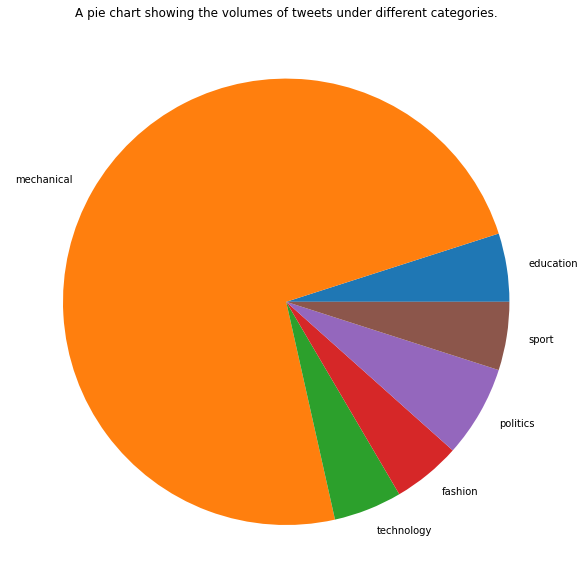

In [219]:
fig = plt.figure(figsize =(10, 15)) 
a = pivot_clusters.drop(['total'], axis = 1)
plt.pie(a.loc['Total'], labels = a.columns)
plt.title('A pie chart showing the volumes of tweets under different categories.')
plt.show()

The mechanical tweets follow, this could be related to the set of words defined as words related to mechanical. Most of these terms are general, thus if a tweet that maybe was more technology related could have more mechanical words thantechnologyt words and thus classified as mechanical, so this is mainnly a bias in the classification method.


* Users with most tweets

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'total tweets')

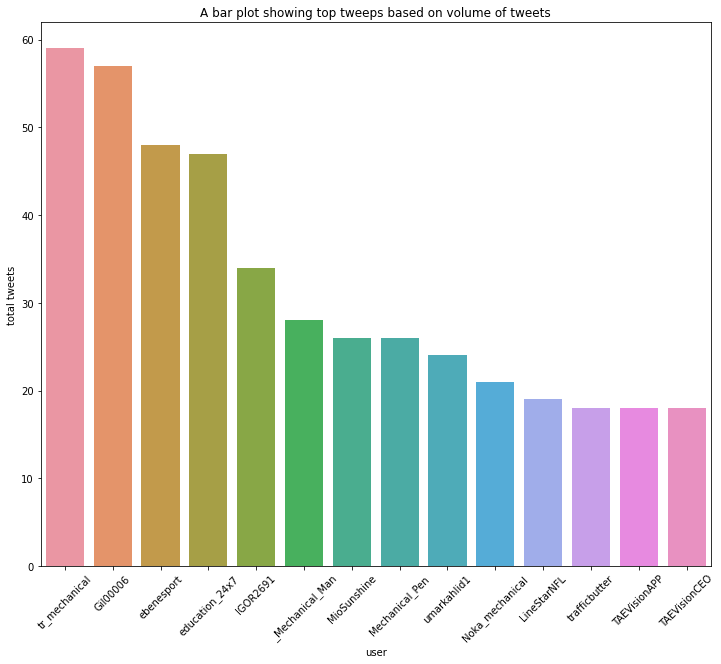

In [220]:
d = pivot_clusters.sort_values(by = 'total', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.total)
plt.title('A bar plot showing top tweeps based on volume of tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('total tweets')

Text(0, 0.5, 'sport tweets')

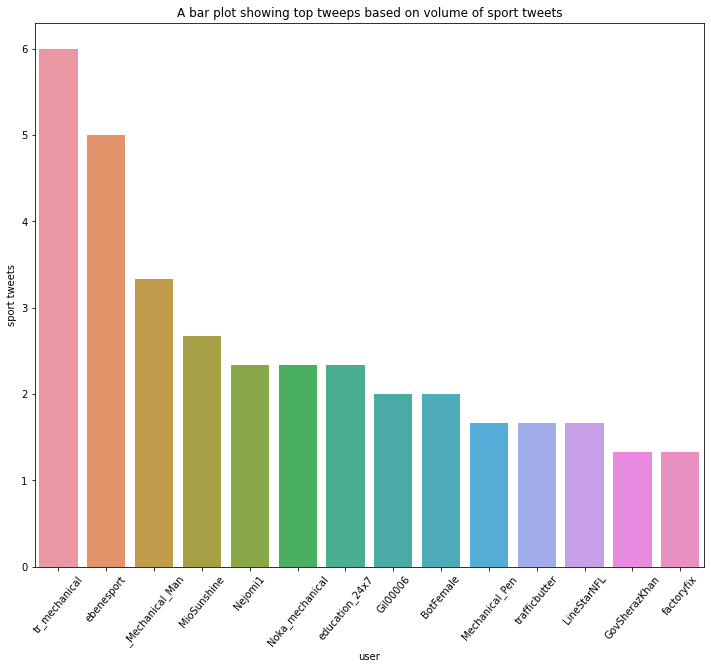

In [221]:
d = pivot_clusters.sort_values(by = 'sport', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.sport)
plt.title('A bar plot showing top tweeps based on volume of sport tweets')
plt.xticks(rotation=50)
plt.xlabel('user')
plt.ylabel('sport tweets')

* Users with most politics tweets

Text(0, 0.5, 'politics tweets')

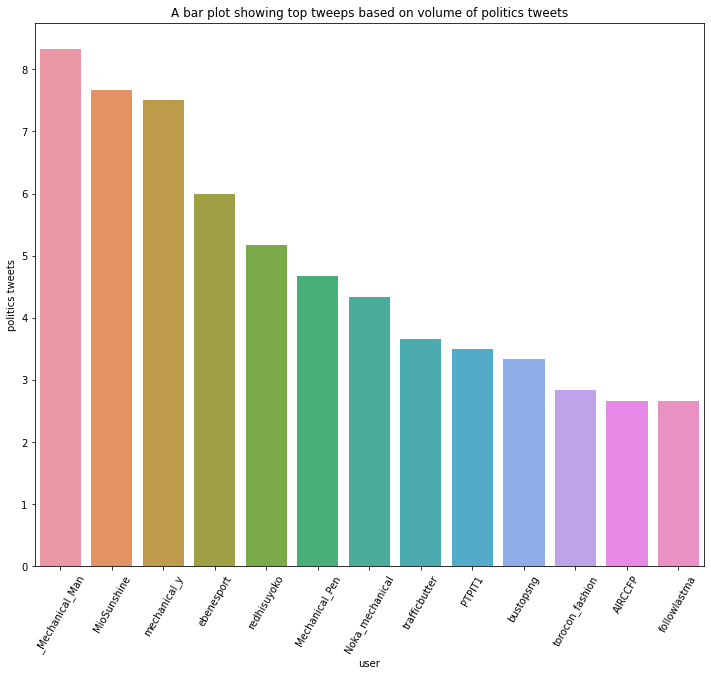

In [222]:
d = pivot_clusters.sort_values(by = 'politics', ascending  = False)
e = d.head(15)
e.drop(e.head(2).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.politics)
plt.title('A bar plot showing top tweeps based on volume of politics tweets')
plt.xticks(rotation=60)
plt.xlabel('user')
plt.ylabel('politics tweets')

*  Users with most education tweets

Text(0, 0.5, 'education tweets')

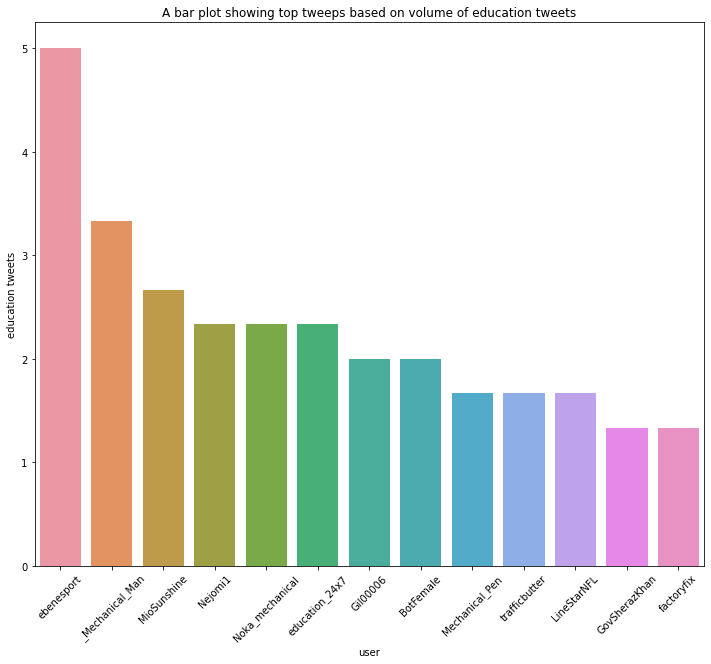

In [223]:
d = pivot_clusters.sort_values(by = 'education', ascending  = False)
e = d.head(15)
e.drop(e.head(2).index, inplace=True)

plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.education)
plt.title('A bar plot showing top tweeps based on volume of education tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('education tweets')

*  Users with most mechanical tweets

Text(0, 0.5, 'mechanical tweets')

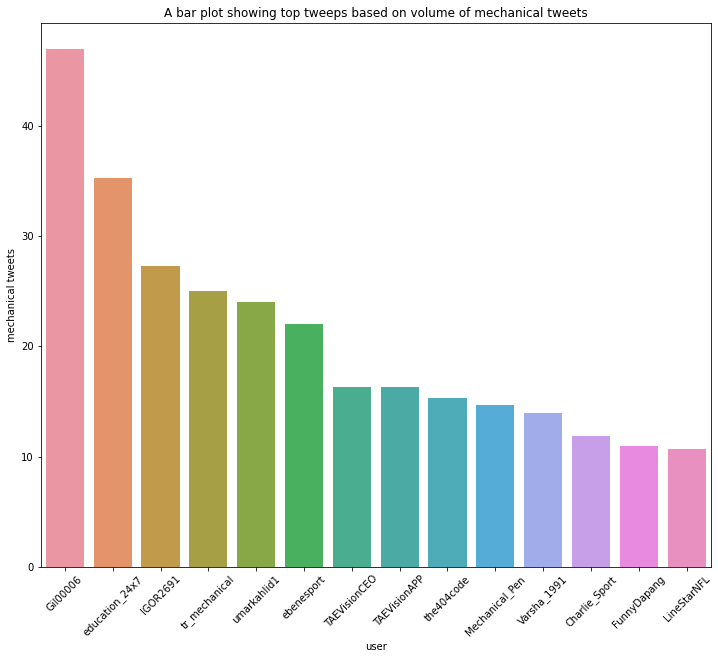

In [224]:
d = pivot_clusters.sort_values(by = 'mechanical', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,10))
sns.barplot(x = e.index, y = e.mechanical)
plt.title('A bar plot showing top tweeps based on volume of mechanical tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('mechanical tweets')

* Users with most technology tweets


/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Text(0, 0.5, 'technology tweets')

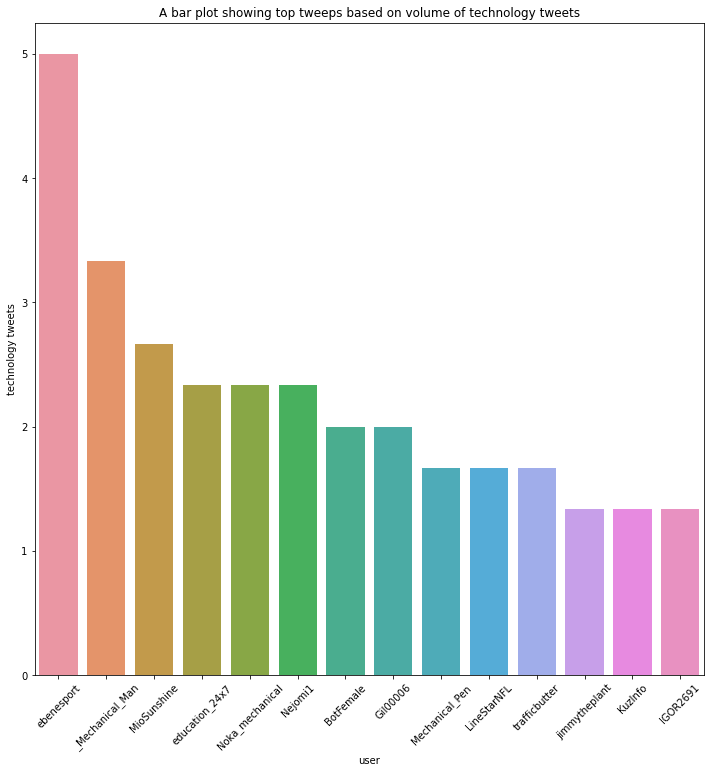

In [244]:
d = pivot_clusters.sort_values(by = 'technology', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,12))
sns.barplot(x = e.index, y = e.technology)
plt.title('A bar plot showing top tweeps based on volume of technology tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('technology tweets')

*  Users with most fashion tweets

Text(0, 0.5, 'fashion tweets')

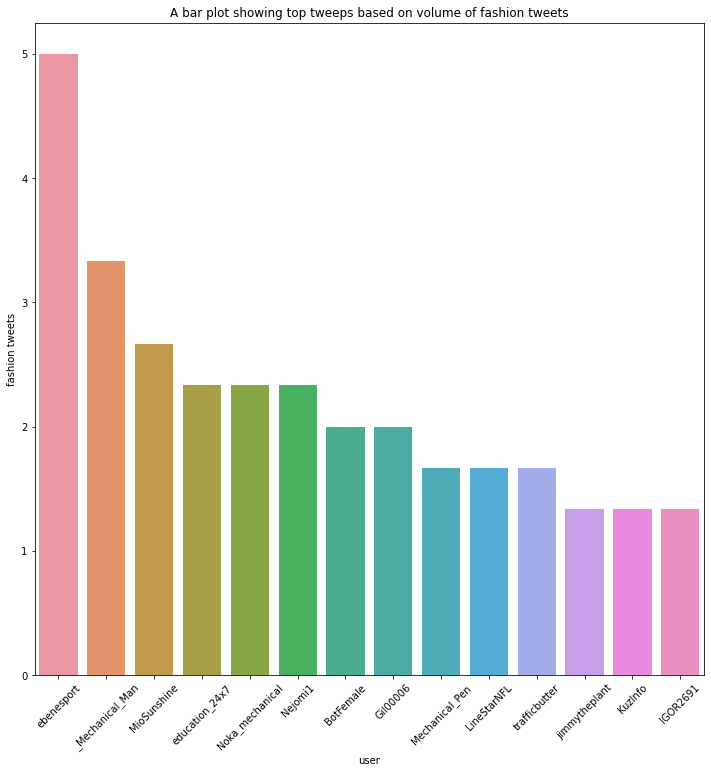

In [245]:
d = pivot_clusters.sort_values(by = 'fashion', ascending  = False)
e = d.head(15)
e.drop(e.head(1).index, inplace=True)


plt.figure(figsize=(12,12))
sns.barplot(x = e.index, y = e.fashion)
plt.title('A bar plot showing top tweeps based on volume of fashion tweets')
plt.xticks(rotation=45)
plt.xlabel('user')
plt.ylabel('fashion tweets')

Distribution test and skewness

In [227]:
from statistics import mean
import re
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
from sklearn.preprocessing import StandardScaler

In [228]:
# drop the totals row.
print(pivot_clusters.shape)
pivot_clusters.drop(pivot_clusters.tail(1).index,inplace=True)
print(pivot_clusters.shape)

(17594, 7)
(17593, 7)


# KMeans Clustering.

2D Clusters


In [229]:
from sklearn.cluster import KMeans

* Politics-Sport

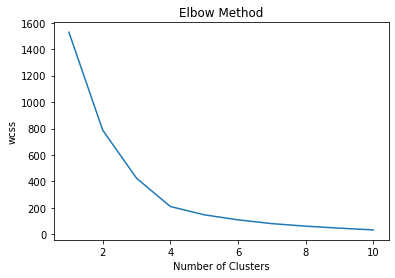

In [230]:
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['politics', 'sport']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

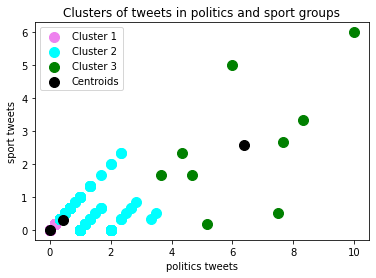

In [231]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
#plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
#plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in politics and sport groups')
plt.xlabel('politics tweets')
plt.ylabel('sport tweets')
plt.legend()
plt.show()

* Fashion-Politics

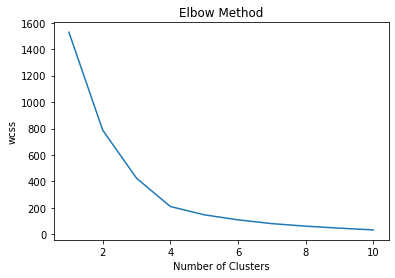

In [232]:
# X = pivot_clusters.iloc[:, [0,1]].values
X = pivot_clusters[['politics', 'fashion']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

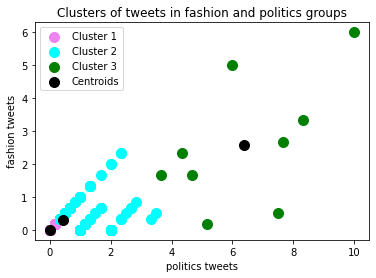

In [233]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in fashion and politics groups')
plt.xlabel('politics tweets')
plt.ylabel('fashion tweets')
plt.legend()
plt.show()

> Technology-Mechanical

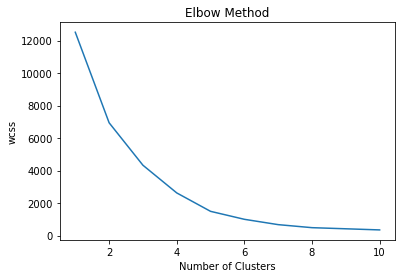

In [234]:

# X = pivot_clusters.iloc[:, [2,3]].values
X = pivot_clusters[['technology', 'mechanical']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

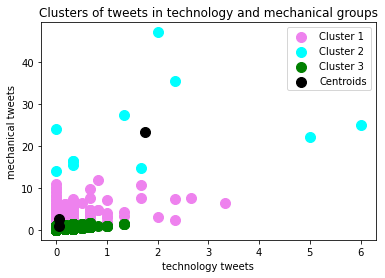

In [235]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in technology and mechanical groups')
plt.xlabel('technology tweets')
plt.ylabel('mechanical tweets')
plt.legend()
plt.show()

 > Technology-Fashion

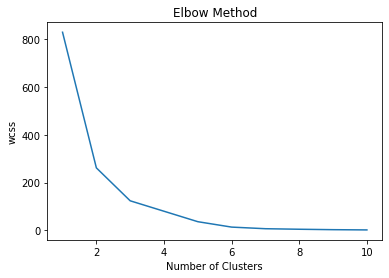

In [236]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['technology', 'fashion']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

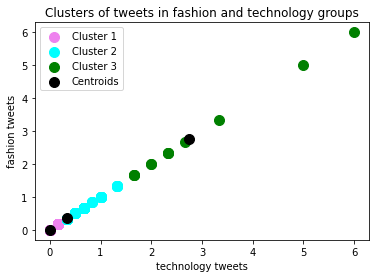

In [237]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
# plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in fashion and technology groups')
plt.xlabel('technology tweets')
plt.ylabel('fashion tweets')
plt.legend()
plt.show()

> Technology-Mechanical

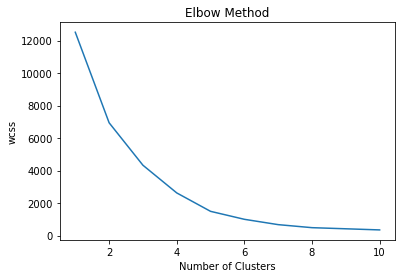

In [238]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['technology', 'mechanical']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

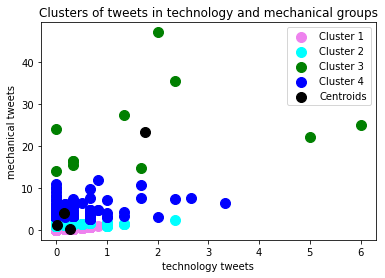

In [239]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
#plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in technology and mechanical groups')
plt.xlabel('technology tweets')
plt.ylabel('mechanical tweets')
plt.legend()  
plt.show()

> 
Education-Politics

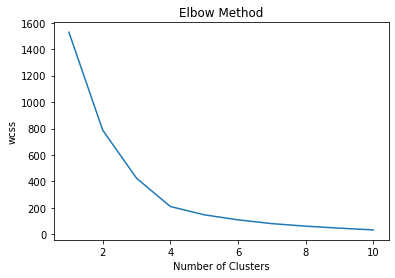

In [240]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['education', 'politics']].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

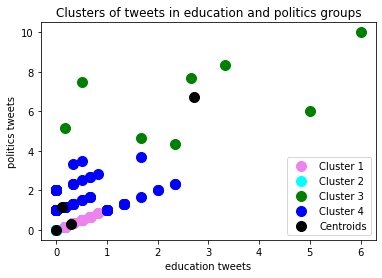

In [241]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=100, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=100, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=100, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=100, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=100, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in education and politics groups')
plt.xlabel('education tweets')
plt.ylabel('politics tweets')
plt.legend()
plt.show()


* Fashion*Mechanical

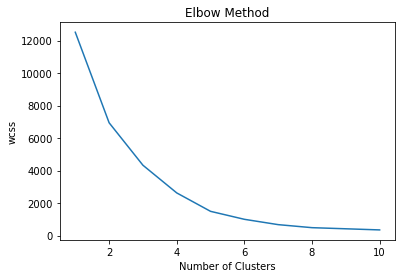

In [242]:
# X = pivot_clusters.iloc[:, [2,4]].values
X = pivot_clusters[['fashion', 'mechanical',]].values

# Elbow Method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()

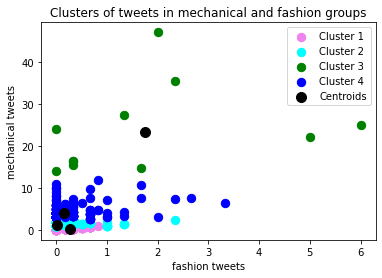

In [243]:
# fitting kmeans to dataset
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, max_iter=300, random_state=0)
Y_kmeans = kmeans.fit_predict(X)

# Visualising the clusters
plt.scatter(X[Y_kmeans==0, 0], X[Y_kmeans==0, 1], s=70, c='violet', label= 'Cluster 1')
plt.scatter(X[Y_kmeans==1, 0], X[Y_kmeans==1, 1], s=70, c='cyan', label= 'Cluster 2')
plt.scatter(X[Y_kmeans==2, 0], X[Y_kmeans==2, 1], s=70, c='green', label= 'Cluster 3')
plt.scatter(X[Y_kmeans==3, 0], X[Y_kmeans==3, 1], s=70, c='blue', label= 'Cluster 4')
# plt.scatter(X[Y_kmeans==4, 0], X[Y_kmeans==4, 1], s=70, c='magenta', label= 'Cluster 5')
# plt.scatter(X[Y_kmeans==5, 0], X[Y_kmeans==5, 1], s=100, c='pink', label= 'Cluster 6')
# plt.scatter(X[Y_kmeans==6, 0], X[Y_kmeans==6, 1], s=100, c='yellow', label= 'Cluster 7')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='black', label='Centroids' )
plt.title('Clusters of tweets in mechanical and fashion groups')
plt.xlabel('fashion tweets')
plt.ylabel('mechanical tweets')
plt.legend()
plt.show()